# List comprehensions, lambdas, and histograms

Often we want to generate/process/manipulate lists of data. There's several ways you can do this in python, but comprehensions are the fastest and neatest way to express a lot of operations. We'll look at some general tasks of plotting functions and data to see how we can acheive this.

Let's generate some data we want to analyse.

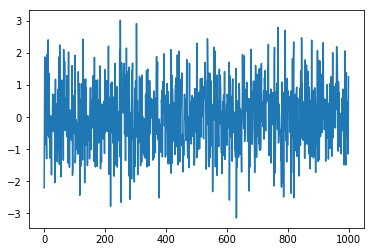

In [1]:
import numpy
import pylab

#Lets create the random data
sigma = 1.0 # Standard deviation
mu = 0.0    # Average value
data = []
for i in range(1000):
    data.append(numpy.random.normal(mu, sigma))

pylab.plot(data)
pylab.show()

Before we analyse this data, lets talk about the way we generated the data. We took three lines to generate it, creating a list, then a loop, then pushing items to the back of the loop. Its not immediately clear that ALL of those three lines were to put together a list of values.

Python has list comprehensions, which let us write the same in just one line:

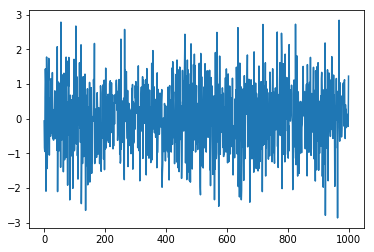

In [2]:
data = [numpy.random.normal(0.0, 1.0) for i in range(1000)]
pylab.plot(data)
pylab.show()

This is a fast and concise way of generating lists. In-fact, its a transformation from a `range()` to a list of normal/gaussian distributed numbers, and many transformations between lists are written this way. You will see it used a lot in python code online.

Lets histogram this data and see what it looks like,

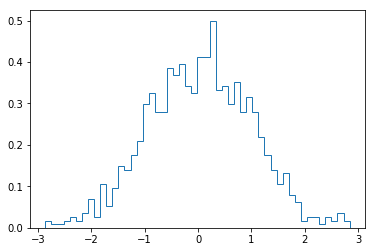

In [3]:
# Use 50 bins, normed=True normalises the histogram to have an area of one
# histtype='step' plots steps for the histogram, which is the most logical 
# choice as it shows the "bins" of the histogram
n, bins, patches = pylab.hist(data, 50, normed=True, histtype='step')
# What is returned is n (the values of each bin), bins (the location of each 
# bin), and patches (the drawing object for the histogram)
pylab.show()

That was very easy, but is it correct? Lets plot the proper gaussian/normal function and see how well it fits.

$$P(x)=\frac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{1}{2}\left((x-\mu)/\sigma\right)^2 }. $$

How should we put this into python? One way is to write a function,

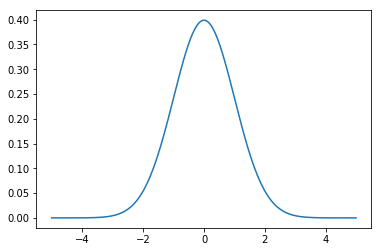

In [4]:
from math import exp, sqrt, pi #Just import what we need
from numpy import arange

def P(x):
  return exp(-0.5 * ((x - mu)/ sigma)**2) / sqrt(2.0 * pi) / sigma

#Generate a list of numbers from -5 to 5 in steps of 0.01
xvals = numpy.arange(-5.0, 5.0, 0.01)
#Now generate y values
yvals = [P(x) for x in xvals]
pylab.plot(xvals, yvals)
pylab.show()

And that's fine, its readable, useful. Can we do this in less lines though? First, lets get rid of xvals, and use `lambda` functions,


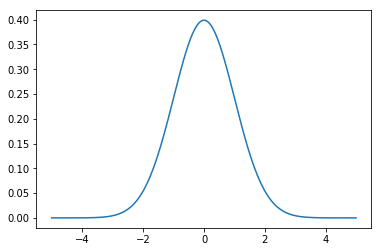

In [5]:
P = lambda x : exp(-0.5 * ((x - mu)/ sigma)**2) / sqrt(2.0 * pi) / sigma
yvals = [P(x) for x in numpy.arange(-5.0, 5.0, 0.01)]
pylab.plot(xvals, yvals)
pylab.show()

lambda's allow you to generate function objects in one line, but their real power is that you can make anonymous functions. `P` is just like any other normal variable, except it now points to a function which has no name! This is mainly useful when you want to pass a simple function to another function, like below.

In [6]:
student_tuples = [
        ('john', 'A', 15),
        ('jane', 'B', 12),
        ('dave', 'B', 10)
]
student_tuples.sort(key=lambda student: student[2])# sort by the third field (age)
print(student_tuples)

[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]


But we can make the plotting even shorter by dropping the lambda too,

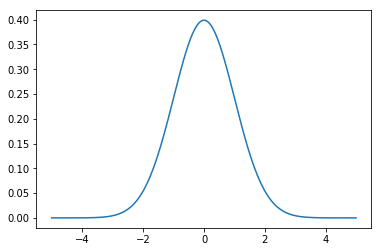

In [7]:
pylab.plot(xvals, [exp(-0.5 * ((x - mu)/ sigma)**2) / sqrt(2.0 * pi) / sigma for x in numpy.arange(-5.0, 5.0, 0.01)])
pylab.show()

I was so obsessed with making it one line, I never stopped to ask if I should? Did I improve the code or make it worse?

The best code is readable and self explanatory, the one-liner is cryptic and unreadable. Things like lambdas and list comprehensions are great, but only for simple tasks (like sorting). For complex ones, they make it even more complex. Don't be afraid to break everything up into logical steps/functions.

OK, lets see the whole program with a conciseness I find pleasing.

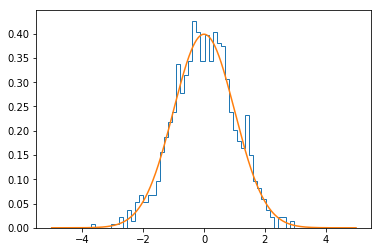

In [8]:
from math import exp, sqrt, pi
from numpy import arange   

data = [numpy.random.normal(0.0, 1.0) for i in range(1000)]
n, bins, patches = pylab.hist(data, 50, normed=True, histtype='step')
exact_xvals = numpy.arange(-5.0, 5.0, 0.01)
P = lambda x : exp(-0.5 * ((x - mu)/ sigma)**2) / sqrt(2.0 * pi) / sigma
exact_yvals = [P(x) for x in exact_xvals]
pylab.plot(exact_xvals, exact_yvals)
pylab.show()

# Running other programs

In [9]:
# When running other programs, we want to capture their output and possibly run 
# them in the background. The subprocess library lets us do this.
import subprocess

# Here we run a program. Say to execute it in a shell (so its exactly like typing it in by hand)
# We connect the stdout (normal program output) to a pipe, so we can catch it in python.
# Then we connect stderr (the errors) to stdout as well so there's just one text stream to monitor
p = subprocess.Popen('uname -a && whoami', shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
# Now the program is running in the background, python carries on!

# Here we read the output from the program, line by line, as its written out
for line in p.stdout.readlines():
  #If the program goes quiet, python will stick in p.stdout.readlines() waiting
  #Here we just print each line as it comes
  print(line)
  #readlines() eventually finishes when the program quits

# We don't really wait here, we already know the program has finished, we're just getting its exit status
retval = p.wait()

b'Linux MarcusLenovo 4.10.0-42-generic #46-Ubuntu SMP Mon Dec 4 14:38:01 UTC 2017 x86_64 x86_64 x86_64 GNU/Linux\n'
b'mjki2mb2\n'


Here we see the computer is running linux, and we're actually an administrator! Lets download a 

In [10]:
def run_and_print(cmd):
  p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
  for line in p.stdout.readlines():
    print(line)
  retval = p.wait()
  
run_and_print("free -h")
run_and_print('cat /proc/cpuinfo | grep "model name"')

b'              total        used        free      shared  buff/cache   available\n'
b'Mem:           7.7G        2.6G        2.3G        442M        2.8G        4.4G\n'
b'Swap:          2.0G          0B        2.0G\n'
b'model name\t: Intel(R) Core(TM) M-5Y71 CPU @ 1.20GHz\n'
b'model name\t: Intel(R) Core(TM) M-5Y71 CPU @ 1.20GHz\n'
b'model name\t: Intel(R) Core(TM) M-5Y71 CPU @ 1.20GHz\n'
b'model name\t: Intel(R) Core(TM) M-5Y71 CPU @ 1.20GHz\n'


Two processors, 12 Gb of ram. Nice!